In [1]:
import logging

p
logging.info("Model training notebook started")

INFO:root:Model training notebook started


In [2]:
import csv
import glob
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

PROJECT_ROOT_DIR = os.path.dirname(os.getcwd())

data_files_dir = os.path.abspath(os.path.join(PROJECT_ROOT_DIR, "train_model", "data"))
csv_files = glob.glob(os.path.join(data_files_dir, "*.csv"))
logging.info(f"Found {len(csv_files)} CSV files in {data_files_dir}")

data = []
for f in csv_files:
    logging.info(f"Loading {f}")
    with open(f, newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append({"content": row["CONTENT"], "is_spam": int(row["CLASS"])})

df = pd.DataFrame(data)


INFO:root:Found 5 CSV files in /Users/zoltanctoth/src/ezmldev/mlops-course/train_model/data
INFO:root:Loading /Users/zoltanctoth/src/ezmldev/mlops-course/train_model/data/Youtube03-LMFAO.csv
INFO:root:Loading /Users/zoltanctoth/src/ezmldev/mlops-course/train_model/data/Youtube04-Eminem.csv
INFO:root:Loading /Users/zoltanctoth/src/ezmldev/mlops-course/train_model/data/Youtube05-Shakira.csv
INFO:root:Loading /Users/zoltanctoth/src/ezmldev/mlops-course/train_model/data/Youtube02-KatyPerry.csv
INFO:root:Loading /Users/zoltanctoth/src/ezmldev/mlops-course/train_model/data/Youtube01-Psy.csv


In [58]:
df.head(100)

,content,is_spam
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6kCPj8&amp;t=2m19s"">2:19</a> best part﻿",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />But I don&#39;t want to be a human, I want to be a sexy ****ing giraffe.<br /><br /><br />I already have the money for the surgery to elongate my spinal core, the surgery to change my skin pigment, and everything else! Like this post so others can root me on in my dream!!!!<br /><br /><br />Im ****ing with you, I make music, check out my first song! <a rel=""nofollow"" class=""ot-hashtag"" href=""https://plus.google.com/s/%23giraffebruuh"">#giraffebruuh</a>﻿",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
95,Check out this video on YouTube:﻿,1
96,Never get old ﻿,0
97,I remember when this used to be so popular all around at the time.<br />I still love it.﻿,0
98,Strong messages in every song I&#39;ve heard.﻿,0


In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud(df):
    all_text = ' '.join(df['content'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

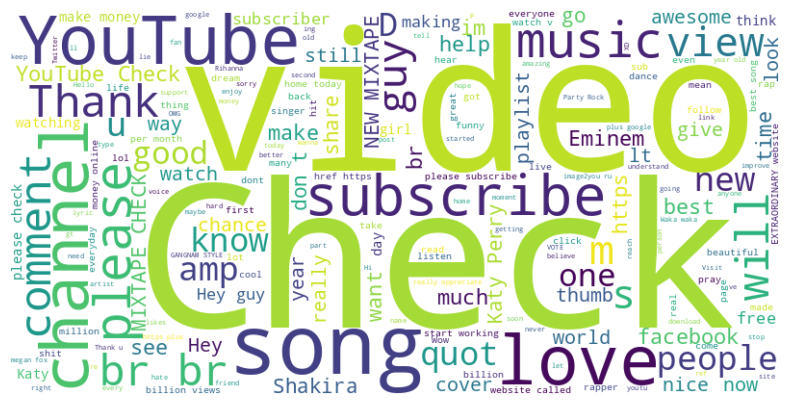

In [60]:
draw_wordcloud(df)

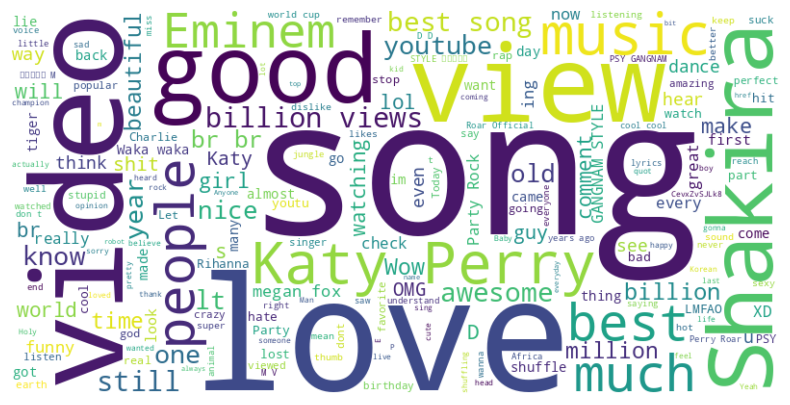

In [61]:
draw_wordcloud(df[ df["is_spam"] == 0 ])

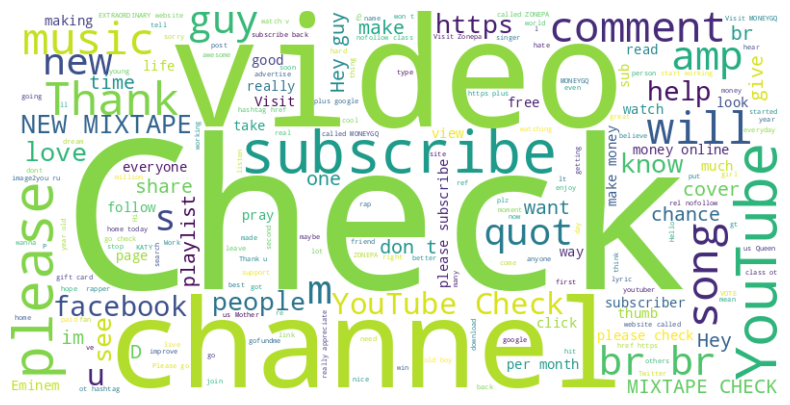

In [62]:
draw_wordcloud(df[ df["is_spam"] == 1 ])

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(df["content"])

X = vectorizer.transform(df["content"])
y = df["is_spam"]

In [83]:
# Train logistic regression model

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"LogReg Accuracy: {accuracy}")

y_pred_proba = classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"LogReg AUC: {auc}")


LogReg Accuracy: 0.951530612244898
LogReg AUC: 0.9831803060545576


In [97]:
# let's do this the MLflow way

In [98]:
import mlflow

mlflow.set_experiment("Spam Classification")
with mlflow.start_run(run_name="Logistic Regression"):
    mlflow.log_param("type", "logreg")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("auc", auc)

2023/08/22 10:02:41 INFO mlflow.tracking.fluent: Experiment with name 'Spam Classification' does not exist. Creating a new experiment.
